**EXAMEN PRÁCTICAS MÉTODOS NUMÉRICOS II**

Laura Lázaro Soraluce

20.03.2023

In [127]:
#Importamos los módulos que vamos a usar

import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sp
from numpy import sign
from decimal import *

Comenzamos definiento S y M, teniendo en cuenta que mi DNI es 45350527

In [128]:
S=4+5+3+5+0+5+2+7

In [129]:
M=S/8

In [130]:
S,M

(31, 3.875)

Tenemos que resolver la ecuación cúbica
$x^3+3.875x+31=0$
Comenzamos definiendo la función:

In [131]:
x=sp.Symbol('x')
def f(x):
    return x**3+M*x+S

Vamos a comenzar esbozando la gráfica y así podremos, posteriormente, elegir el intervalo.

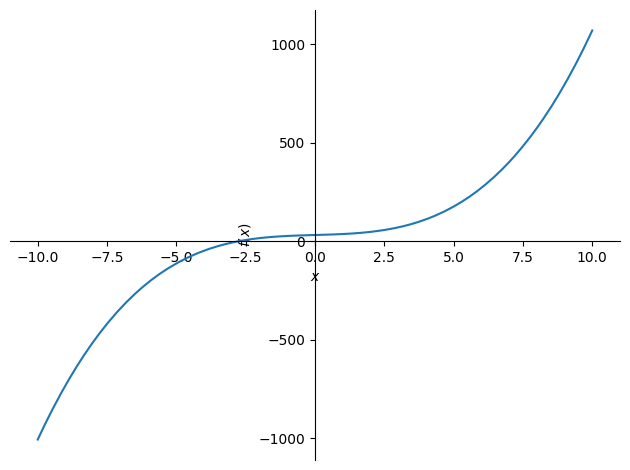

In [132]:
sp.plot(f(x))

La esbozamos en un intervalo de longitud 1 para verla mejor:

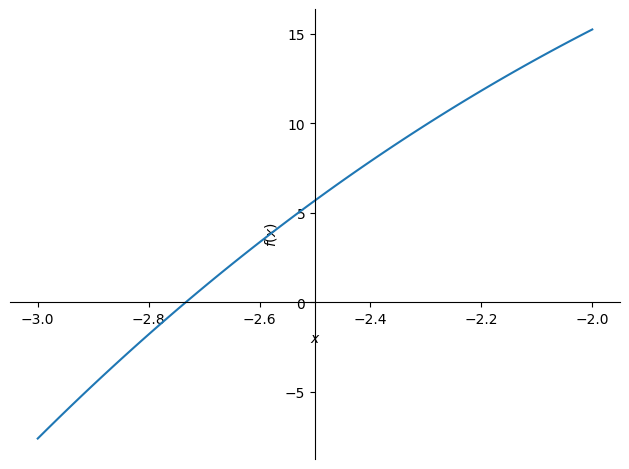

In [133]:
a=-3;b=-2
sp.plot(f(x),(x,a,b))

Implementamos una solución para ver cuál es la raíz exacta:

In [134]:
def solucion_exacta(f, a=-sp.oo, b=sp.oo, cifras=None):
    x = sp.Symbol('x')
    try:
        sol_exact = sp.solve(f(x), x)
    except:
        sol_exact = []
    
    for sol in sol_exact:
        if sol.is_real:
            if sol >= a and sol <= b:
                print("Solución exacta en decimal:", sol.evalf())
                if cifras:
                    print("Solución exacta con", cifras, "cifras significativas:", sol.evalf(n=cifras+1))
                return sol
    
    print("sympy no ha podido encontrar la solución exacta")

In [135]:
raiz=solucion_exacta(f, -3, -2, cifras=5)

Solución exacta en decimal: -2.73285001554679
Solución exacta con 5 cifras significativas: -2.73285


Tomamos el intervalo $[-3,-2]$ que tiene longitud uno, y aplicamos el método de bisección:

In [136]:
f(a),f(b)

(-7.625, 15.25)

In [137]:
def biseccion(f, a, b, maxiter=100, tol=10**(-5), prec=10**(-3), cifras=0):
    # si no se especifican el número de cifras decimales a mostrar, se hará
    # para que coincida con la precisión, es decir, si la precisión es
    # 10**-n, el número de cifras a mostrar será n
    # en caso de que la precisión no sea una potencia de 10, se usará
    # la potencia de 10 inmediatamente inferior
    if cifras <= 0:
        cifras = int(np.ceil(abs(np.log10(prec))))
    
    exit = ''
    
    niter = 0
    while niter < maxiter:
        niter += 1
        c = (a+b)/2
        if abs(f(c)) < prec:
            exit = 'precisión'
            break
        if sign(f(a)) != sign(f(c)):
            b = c
        else:
            a = c
        if b-a < tol:
            exit = 'tolerancia'
            break
    
    print('maxiter={}, tol={}, prec={}, cifras={}'.format(maxiter, tol, prec, cifras))
    
    if exit == 'precisión':
        print('Se ha alcanzado la precisión deseada')
    elif exit == 'tolerancia':
        print('Se ha alcanzado la máxima tolerancia')
    elif niter >= maxiter:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución:', Decimal(c))
    print('Aproximación de la solución con', cifras, 'cifras significativas:', round(Decimal(c), cifras))
    print('Número de iteraciones:', niter)
    print('Último intervalo: a: ', a, ' y b: ', b)
    
    return c

Usamos tolerancia de una décima:

In [138]:
biseccion(f,-3,-2,tol=10**(-1))

maxiter=100, tol=0.1, prec=0.001, cifras=3
Se ha alcanzado la máxima tolerancia
Aproximación de la solución: -2.6875
Aproximación de la solución con 3 cifras significativas: -2.688
Número de iteraciones: 4
Último intervalo: a:  -2.75  y b:  -2.6875


-2.6875

Para el método de bisección utilizamos este intervalo: a0=-2.75 y b0:-2.6875

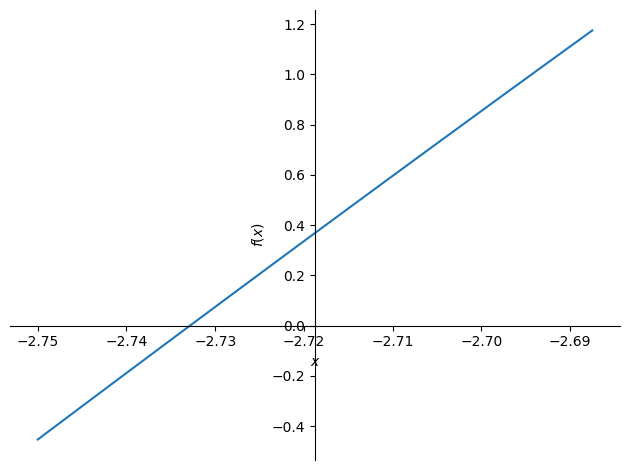

In [139]:
a0=-2.75; b0=-2.6875
sp.plot(f(x),(x,a0,b0))

Vamos ahora a realizar el método de la secante, usando a0 y b0 como extremos del intervalo de inicio:

In [140]:
def secante(f, x0, x1, nmax=100, prec=10**(-3), tol=10**(-5), cifras=0):
    sale =''
    if cifras <= 0:
        cifras = int(np.ceil(abs(np.log10(prec))))
    niter = 0; # getcontext().prec = mp
    for k in range(nmax):
        niter = niter + 1;
        c = x1 - (x0-x1)/(f(x0)-f(x1))*f(x1) 
        if abs(f(c)) < prec:
            sale = 'precision'
            break
        else:
            x1,x0 = c,x1
        if abs(x1-x0) < tol:
            sale = 'tolerancia'
            break

    print('maxiter={}, tol={}, prec={}, cifras={}'.format(nmax, tol, prec, cifras))
    
    if exit == 'precisión':
        print('Se ha alcanzado la precisión deseada')
    elif exit == 'tolerancia':
        print('Se ha alcanzado la máxima tolerancia')
    elif niter >= nmax:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución:', Decimal(c))
    print('Aproximación de la solución con', cifras, 'cifras significativas:', round(Decimal(c), cifras))
    print('Número de iteraciones:', niter)
    return x1

Realizamos 10 iteraciones:

In [141]:
secante(f, a0, b0, nmax=10)

maxiter=10, tol=1e-05, prec=0.001, cifras=3
Aproximación de la solución: -2.732853496582560826055896541220135986804962158203125
Aproximación de la solución con 3 cifras significativas: -2.733
Número de iteraciones: 2


-2.7326060878692457

Ya lo he hecho por arriba, pero vuelvo a añadir la solución exacta:

In [142]:
raiz=solucion_exacta(f, -2.8,-2.6, cifras=5)

Solución exacta en decimal: -2.73285001554679
Solución exacta con 5 cifras significativas: -2.73285


Lo hacemos también con una orden directa de Python:

In [143]:
from scipy.optimize import fsolve

In [144]:
fsolve(f, -2.688)[0]

-2.7328500155467914